# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
# Libreria utilizada para el challenge.
!pip install image_slicer

In [2]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

<ipython-input-2-0238ad4d13f7>:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
<ipython-input-2-0238ad4d13f7>:8: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


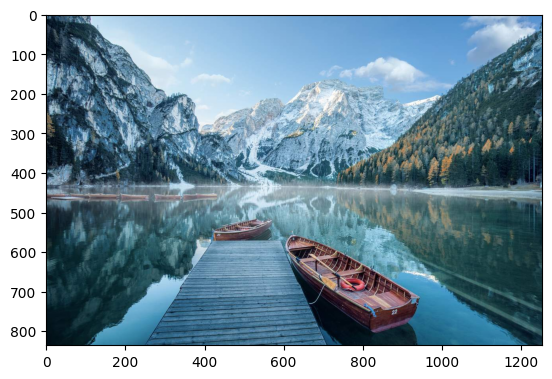

In [4]:
original_image = Image.open('/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img.npy', original_image)

#Load the image
original_image = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

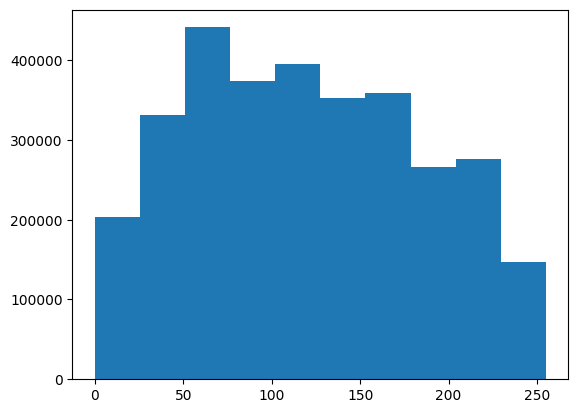

In [5]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

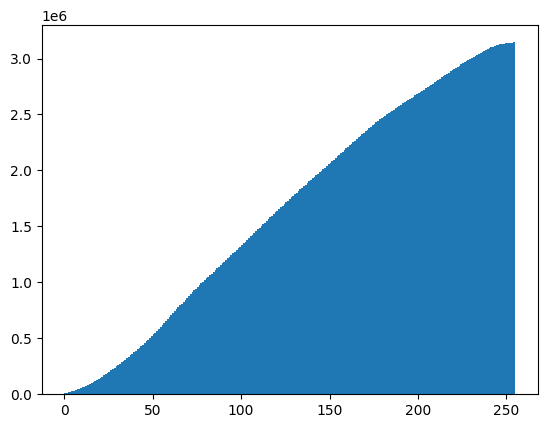

In [6]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


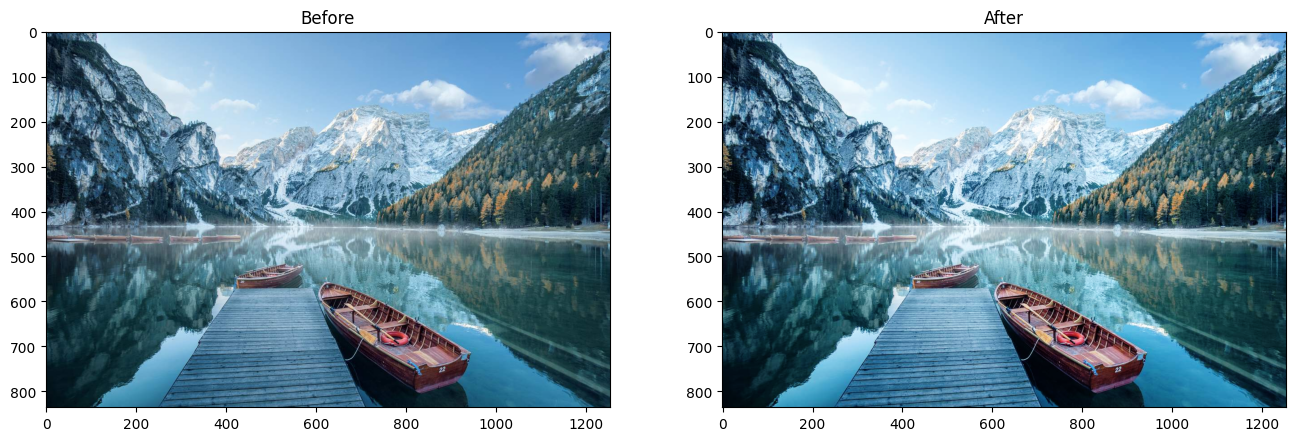

In [7]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

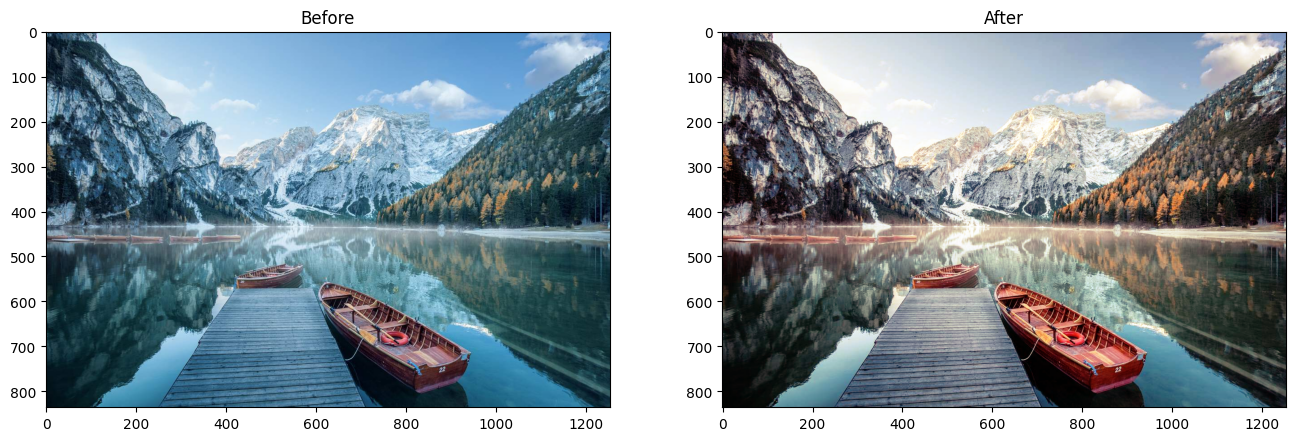

In [8]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

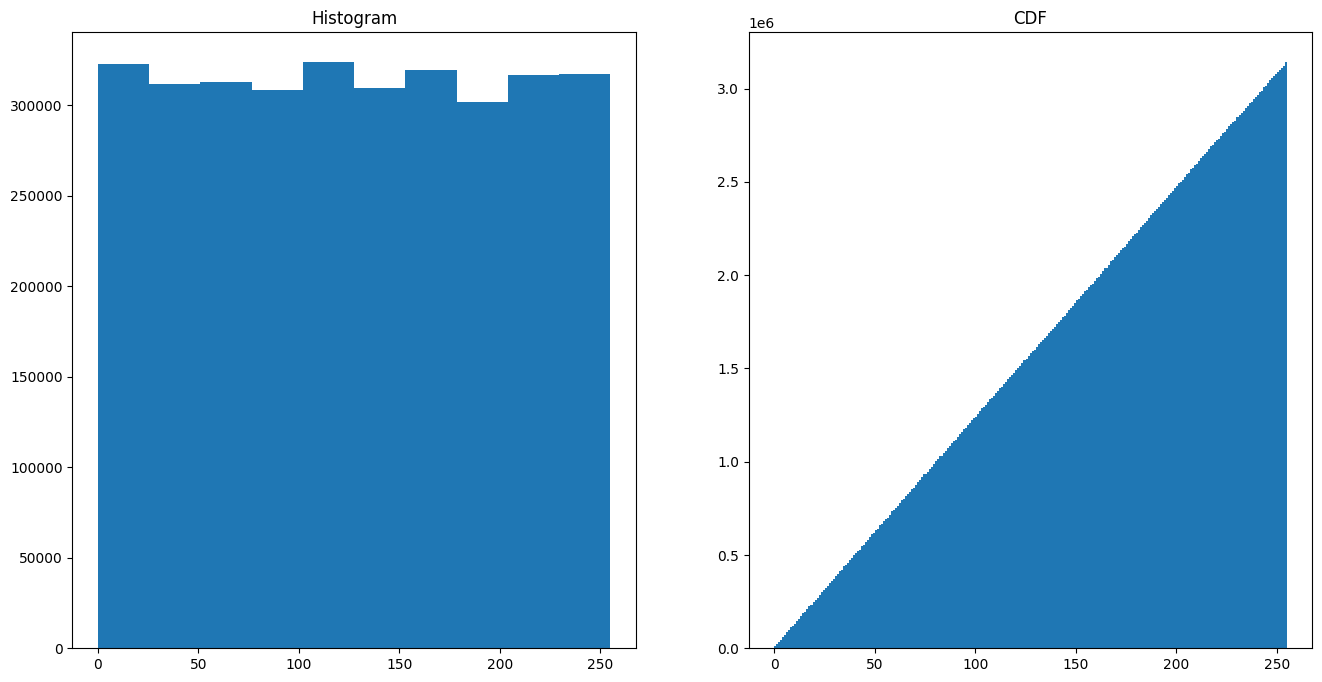

In [9]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

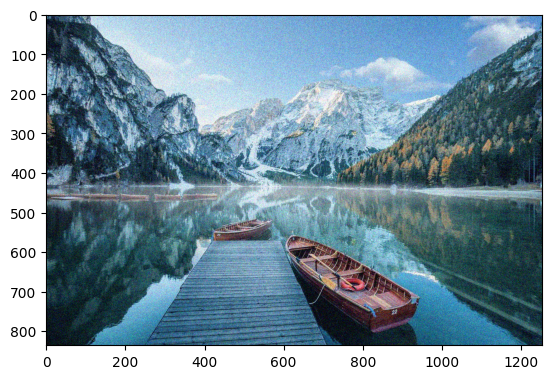

In [10]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

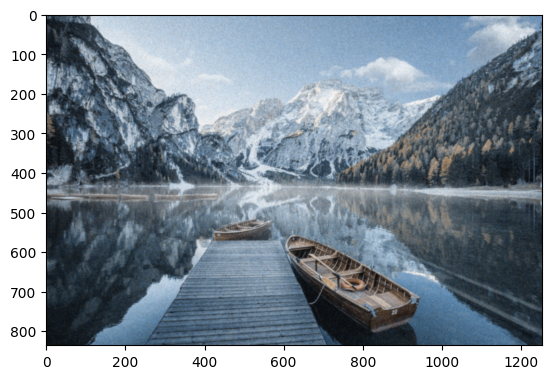

In [11]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

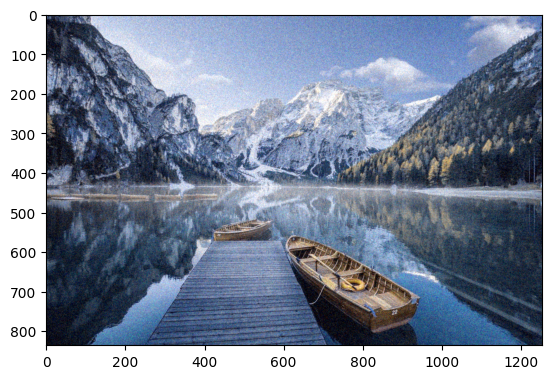

In [12]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [13]:
from image_slicer import slice

n = 4
slice('/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1.jpg', n)

(<Tile #1 - lago_1_01_01.png>,
 <Tile #2 - lago_1_01_02.png>,
 <Tile #3 - lago_1_02_01.png>,
 <Tile #4 - lago_1_02_02.png>)

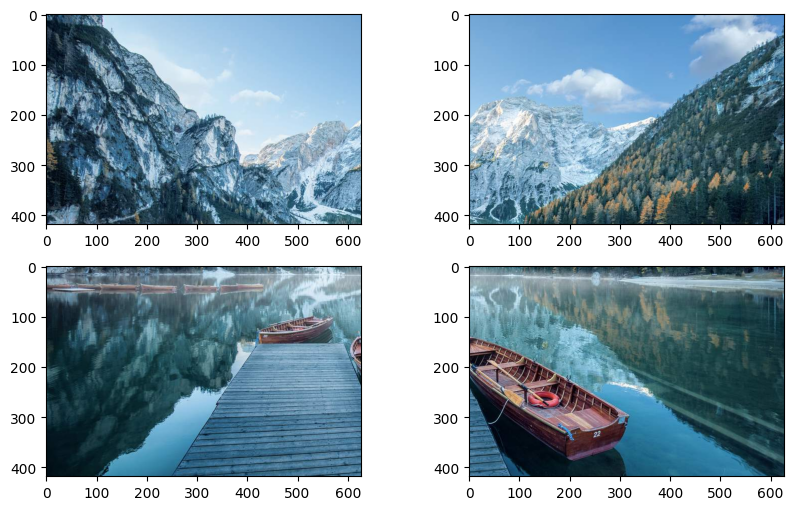

In [14]:
# Separación de la imagen dentro de 4 subplots
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img_1 = Image.open(f'/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1_01_01.png')
plt.imshow(img_1)

plt.subplot(2,2,2)
img_2 = Image.open(f'/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1_01_02.png')
plt.imshow(img_2)

plt.subplot(2,2,3)
img_3 = Image.open(f'/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1_02_01.png')
plt.imshow(img_3)

plt.subplot(2,2,4)
img_4 = Image.open(f'/content/drive/MyDrive/VisionComp_Imagenes/data/lago_1_02_02.png')
plt.imshow(img_4)

plt.show()

In [15]:
# Guardamos las 4 sub-imagenes en formato .npy
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_1.npy', img_1)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_2.npy', img_2)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_3.npy', img_3)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_4.npy', img_4)
# Volvemos a cargar las 4 subpartes para leerlas
img_1_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_1.npy')
img_2_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_2.npy')
img_3_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_3.npy')
img_4_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_4.npy')

Imprimimos los histogramas para cada una de las figuras

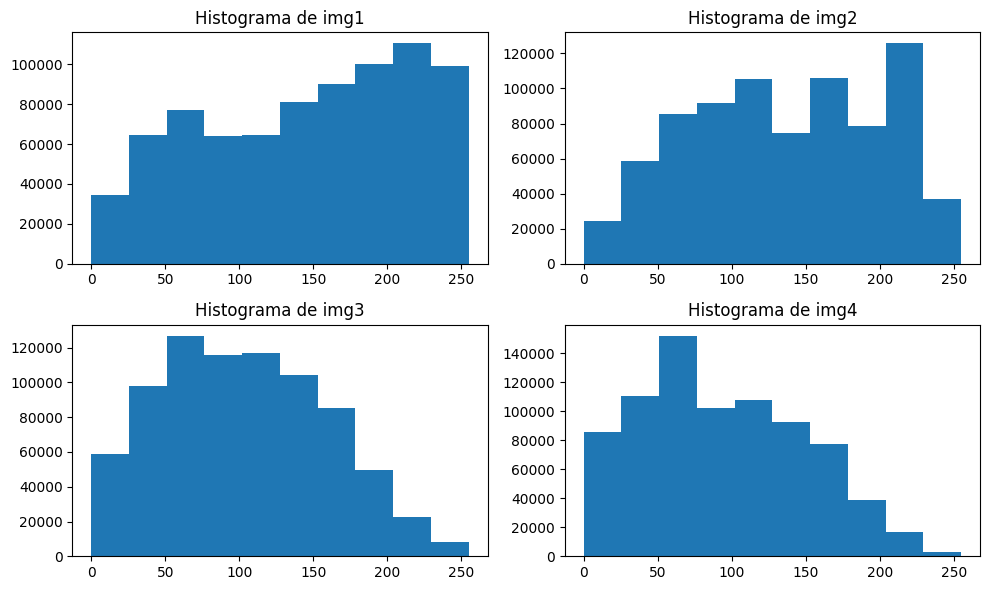

In [16]:

# Creamos una red de 2x2 para el subplot
fig = plt.figure(figsize=(10, 6))

# Subplot 1
plt.subplot(2, 2, 1)
plt.hist(img_1_np.ravel())
plt.title("Histograma de img1")

# Subplot 2
plt.subplot(2, 2, 2)
plt.hist(img_2_np.ravel())
plt.title("Histograma de img2")

# Subplot 3
plt.subplot(2, 2, 3)
plt.hist(img_3_np.ravel())
plt.title("Histograma de img3")

# Subplot 4
plt.subplot(2, 2, 4)
plt.hist(img_4_np.ravel())
plt.title("Histograma de img4")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


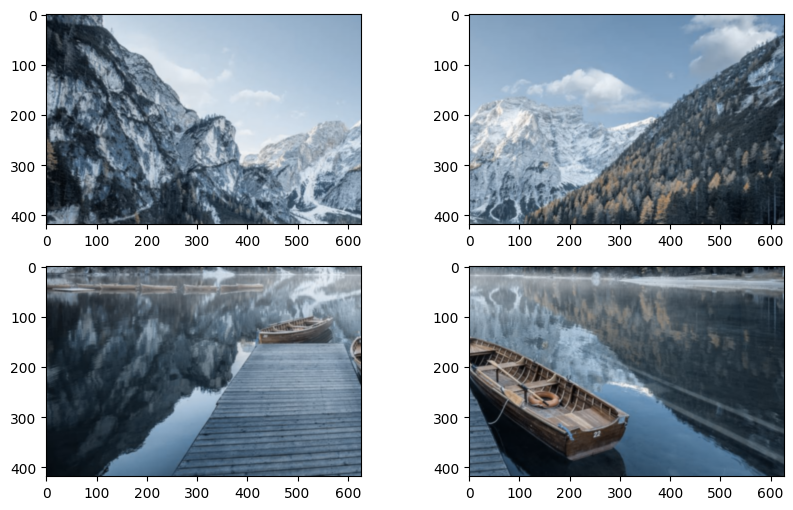

In [17]:
# Imprimimos las imagenes ecualizadas por medio del metodo gausiano
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img_1_eq = gauss(img_1, sigma=1)
plt.imshow(img_1_eq)

plt.subplot(2,2,2)
img_2_eq = gauss(img_2, sigma=1)
plt.imshow(img_2_eq)

plt.subplot(2,2,3)
img_3_eq = gauss(img_3, sigma=1)
plt.imshow(img_3_eq)

plt.subplot(2,2,4)
img_4_eq = gauss(img_4, sigma=1)
plt.imshow(img_4_eq)

plt.show()

In [18]:
# Volvemos a guardar las imagene
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_1.npy', img_1_eq)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_2.npy', img_2_eq)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_3.npy', img_3_eq)
np.save('/content/drive/MyDrive/VisionComp_Imagenes/data/img_4.npy', img_4_eq)
# Se cargan las imagenes
img_1_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_1.npy')
img_2_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_2.npy')
img_3_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_3.npy')
img_4_np = np.load('/content/drive/MyDrive/VisionComp_Imagenes/data/img_4.npy')

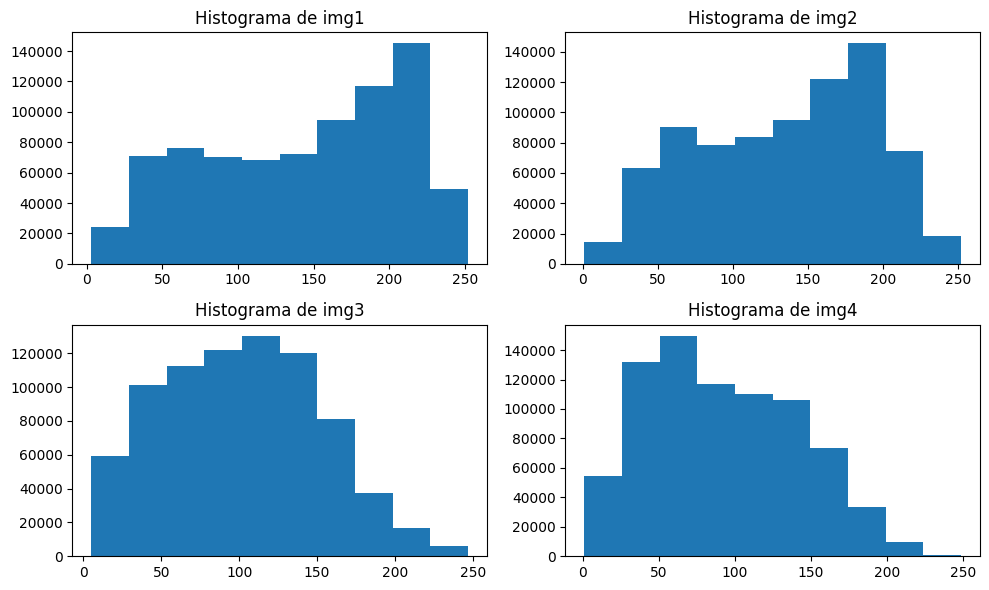

In [19]:
# Imprimimos los nuevos histogramas actualizados
fig = plt.figure(figsize=(10, 6))

# Subplot 1
plt.subplot(2, 2, 1)
plt.hist(img_1_np.ravel())
plt.title("Histograma de img1")

# Subplot 2
plt.subplot(2, 2, 2)
plt.hist(img_2_np.ravel())
plt.title("Histograma de img2")

# Subplot 3
plt.subplot(2, 2, 3)
plt.hist(img_3_np.ravel())
plt.title("Histograma de img3")

# Subplot 4
plt.subplot(2, 2, 4)
plt.hist(img_4_np.ravel())
plt.title("Histograma de img4")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Imagen a utilizar en el resto de Ejercicios.

array([[151, 152, 153, ..., 198, 196, 196],
       [154, 155, 157, ..., 198, 199, 199],
       [154, 155, 157, ..., 198, 199, 199],
       ...,
       [111, 146, 128, ..., 146, 143, 142],
       [135, 131, 115, ..., 146, 149, 152],
       [114, 119, 121, ..., 133, 142, 147]], dtype=uint8)
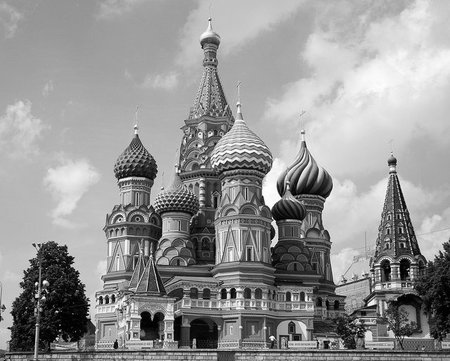

In [20]:
# Ruta e imagen a explorar en escala de grises.
ruta = '/content/drive/MyDrive/VisionComp_Imagenes/data/san_basilio.jpg'
img_tile = cv2.imread(ruta)
img_tile = cv2.cvtColor(img_tile, cv2.COLOR_BGR2GRAY)
img_tile

# Punto 1

Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

# Tile-Based Histogram Equalization (AHE)

La fórmula base sigue el principio de la equalización de histograma:

$T(r)=round((L−1)⋅ \frac{CDF(r)}{CDF_{max}} ​​)$

Donde:

$T(r)$: Nueva intensidad del píxel $r$. \
$r$: Intensidad original del píxel $(0, L−1)$. \
$L$: Número total de niveles de intensidad (por ejemplo, 256 para imágenes de 8 bits). \
$CDF(r)$: Función de distribución acumulada del histograma local. \
$CDF_{max}$​: Máximo valor del CDF en el tile.

### Pasos del algoritmo Tile-Based Histogram Equalization

1. **Entrada**:
   - Una imagen en escala de grises $( I )$.
   - Número de tiles $( T_x )$ y $( T_y )$ en las direcciones horizontal y vertical.
   - Tamaño de cada tile $( w \times h )$.

2. **División de la imagen**:
   - Dividir la imagen en $( T_x \times T_y )$ tiles (subregiones).

3. **Equalización de histograma por tile**:
   - Para cada tile:
     a. Calcular el histograma local $( h(j))$, donde $( j )$ son los niveles de intensidad en el tile.
     b. Calcular la función de distribución acumulada (CDF):
     $$
        \[
        CDF(r) = \sum_{j=0}^{r} h(j)
        \] $$
     c. Normalizar el CDF para calcular $( T(r) )$:
        $$
        \[
        T(r) = \text{round}\left((L - 1) \cdot \frac{CDF(r)}{CDF_{\text{max}}}\right)
        \] $$
     d. Transformar los valores de intensidad del tile usando $( T(r) )$.

4. **Interpolación entre tiles**:
   - Para cada píxel en los bordes entre tiles, calcular un valor interpolado basado en los píxeles de los tiles adyacentes:
    $$
     \[
     I'(x, y) = (1 - w_x)(1 - w_y)I_1 + w_x(1 - w_y)I_2 + (1 - w_x)w_yI_3 + w_xw_yI_4
     \]  $$
     Donde $( I_1, I_2, I_3, I_4 )$ son los píxeles en los tiles adyacentes, y $( w_x, w_y )$ son pesos basados en la distancia al píxel.

5. **Salida**:
   - Una imagen procesada $( I' )$ con contraste mejorado.


In [21]:
def tile_based_ahe(img, tile_size):
    # Obtener dimensiones de la imagen
    alto, anch = img.shape[:2]

    # Validar el tamaño del tile
    if tile_size <= 0 or tile_size > min(alto, anch):
        raise ValueError("El tamaño del tile debe ser positivo y menor que las dimensiones de la imagen.")

    # Crear una imagen de salida
    img_out = np.zeros_like(img)

    # Recorrer la imagen en tiles
    for i in range(0, alto, tile_size):
        for j in range(0, anch, tile_size):
            # Determinar las dimensiones reales del bloque (para bordes)
            tile_alto = min(tile_size, alto - i)
            tile_anch = min(tile_size, anch - j)

            # Extraer el bloque (tile)
            tile = img[i:i + tile_alto, j:j + tile_anch]

            # Calcular histograma y su CDF
            hist, bins = np.histogram(tile.ravel(), bins=256, range=(0, 256))
            cdf = hist.cumsum()
            cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            cdf_normalized = cdf_normalized.astype('uint8')

            # Aplicar la transformación T(r) a cada píxel del bloque
            eq_tile = cdf_normalized[tile]

            # Asignar los valores transformados al bloque correspondiente en la imagen de salida
            img_out[i:i + tile_alto, j:j + tile_anch] = eq_tile

    return img_out


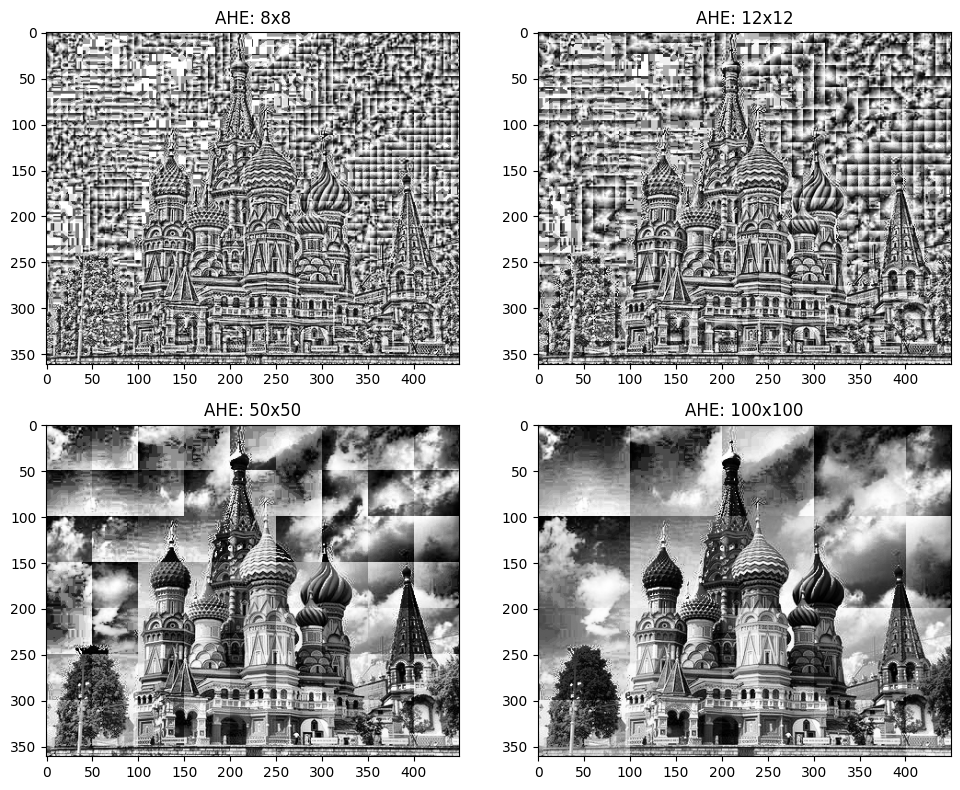

In [22]:
# Crear una figura con subplots de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Mostrar cada resultado en su subplot correspondiente
axes[0, 0].imshow(tile_based_ahe(img_tile,8), cmap='gray')
axes[0, 0].set_title('AHE: 8x8')

axes[0, 1].imshow(tile_based_ahe(img_tile,12), cmap='gray')
axes[0, 1].set_title('AHE: 12x12')

axes[1, 0].imshow(tile_based_ahe(img_tile,50), cmap='gray')
axes[1, 0].set_title('AHE: 50x50')

axes[1, 1].imshow(tile_based_ahe(img_tile,100), cmap='gray')
axes[1, 1].set_title('AHE: 100x100')

# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.show()

Insertar conclusiones aquí:

# Punto 2
Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

# Sliding Window Adaptive Histogram Equalization (SWAHE)

La base del algoritmo se fundamenta en la Equalización de Histograma, que utiliza la fórmula:

$$ T(r)=round((L−1)⋅\sum^{r}_{j=0} ​\frac{h(j)}{MN}​) $$

Donde:

$r$: Valor de intensidad del píxel $(0 a L−1L−1)$. \
$L$: Número total de niveles de intensidad (por ejemplo, 256 para imágenes de 8 bits). \
$h(j)$: Histograma, o frecuencia de la intensidad jj dentro de la ventana. \
$MN$: Número total de píxeles en la ventana.\
$T(r)$: Nuevo valor de intensidad tras la ecualización.

En SWAHE, la fórmula se aplica a ventanas deslizantes dentro de la imagen para calcular $T(r)$ localmente en lugar de usar toda la imagen.

### Pasos del algoritmo Sliding Window Adaptive Histogram Equalization (SWAHE)

1. **Entrada**:
   - Una imagen en escala de grises $( I )$.
   - Tamaño de la ventana $( W \times W )$.

2. **Inicialización**:
   - Obtener las dimensiones de la imagen $( h \times w )$.
   - Inicializar una imagen de salida con valores de cero.

3. **Ventana deslizante**:
   - Deslizar una ventana de tamaño $( W \times W )$ sobre toda la imagen, moviéndola píxel por píxel.

4. **Calcular el histograma local**:
   - Para cada ventana, calcular el histograma local de intensidades dentro de la ventana.

5. **Calcular la CDF local**:
   - Calcular la función de distribución acumulada (CDF) del histograma local.

6. **Normalización de la CDF**:
   - Normalizar la CDF para que sus valores estén en el rango de 0 a $( L-1 )$ (nivel máximo de intensidad).

7. **Transformación de intensidades**:
   - Para cada píxel dentro de la ventana, aplicar la transformación $( T(r) )$ utilizando la CDF local.

8. **Asignar el valor transformado**:
   - Asignar el valor transformado a la imagen de salida.

9. **Manejo de bordes**:
   - Asegurar que los píxeles en los bordes de la imagen (donde la ventana no puede deslizar completamente) sean procesados adecuadamente, generalmente mediante acolchado o duplicación de píxeles.

10. **Salida**:
    - Devolver la imagen resultante con el contraste mejorado mediante ecualización adaptativa.


In [23]:
def swahe_hist_algorithm(img, window_shape):
    # Asegurar que el tamaño de la ventana es impar
    if window_shape % 2 == 0:
        raise ValueError("El tamaño de la ventana debe ser impar.")

    # Obtener las dimensiones de la imagen
    alto, anch = img.shape[:2]
    mid_window = window_shape // 2

    # Acolchar la imagen para manejar los bordes
    padded_image = np.pad(img, pad_width=mid_window, mode='reflect')
    img_out = np.zeros_like(img)

    # Iterar sobre cada píxel de la imagen original
    for row in range(alto):
        for col in range(anch):
            # Extraer la ventana centrada en (row, col)
            window = padded_image[row:row + window_shape, col:col + window_shape]
            # Calcular el histograma y su CDF
            hist, bins = np.histogram(window.ravel(), bins=256, range=(0, 256))
            cdf = hist.cumsum()
            cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            cdf_normalized = cdf_normalized.astype('uint8')
            # Transformar el píxel central usando la CDF
            img_out[row, col] = cdf_normalized[img[row, col]]

    return img_out

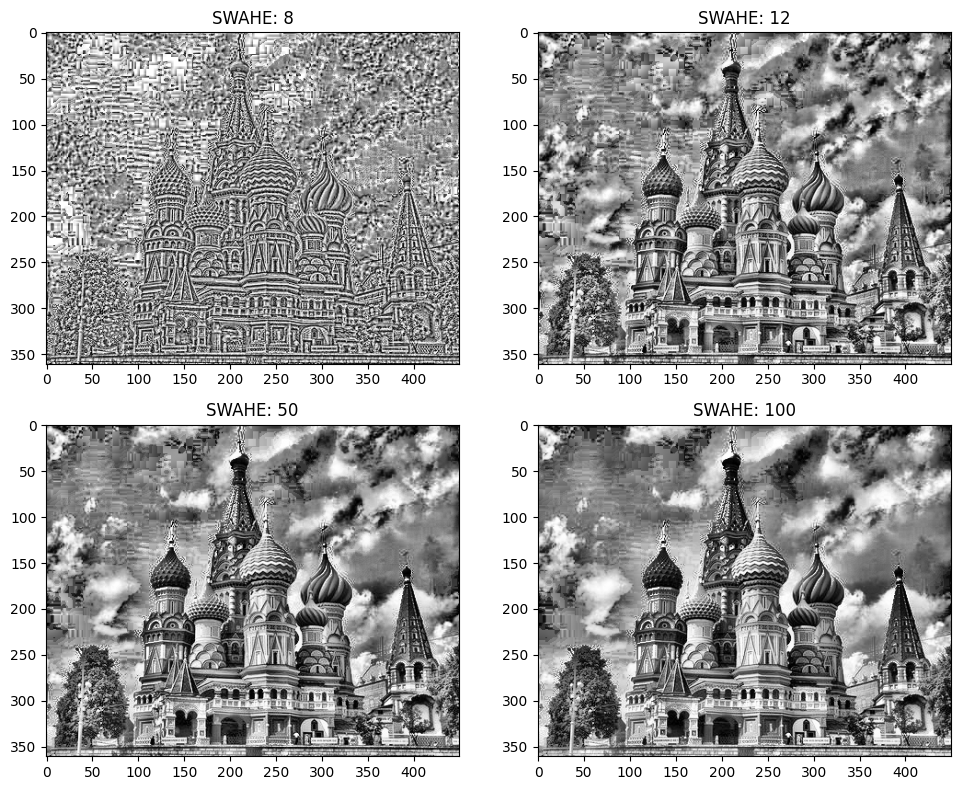

In [24]:
# Crear una figura con subplots de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Mostrar cada resultado en su subplot correspondiente
axes[0, 0].imshow(swahe_hist_algorithm(img_tile,7), cmap='gray')
axes[0, 0].set_title('SWAHE: 8')

axes[0, 1].imshow(swahe_hist_algorithm(img_tile,33), cmap='gray')
axes[0, 1].set_title('SWAHE: 12')

axes[1, 0].imshow(swahe_hist_algorithm(img_tile,51), cmap='gray')
axes[1, 0].set_title('SWAHE: 50')

axes[1, 1].imshow(swahe_hist_algorithm(img_tile,73), cmap='gray')
axes[1, 1].set_title('SWAHE: 100')

# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.show()

# Punto 3
Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

### Explicación del algoritmo CLAHE (Contrast Limited Adaptive Histogram Equalization)

**CLAHE** es una variante del algoritmo **AHE (Adaptive Histogram Equalization)** que tiene como objetivo mejorar el contraste de las imágenes, limitando el aumento de contraste en áreas de alta variabilidad para evitar la sobresaturación de la imagen. Es especialmente útil en imágenes donde el contraste es bajo o donde los detalles finos son difíciles de distinguir.

$$T(r)=round((L−1)⋅\frac{​CDF(r)−CDF_{min}}{CDF_{max}​−CDF_{min}}​​)$$

Donde:
$T(r)$: Nueva intensidad del píxel $r$. \
$r$: Intensidad original del píxel. \
$L$: Número total de niveles de intensidad (por ejemplo, 256 para imágenes de 8 bits). \
$CDF(r)$: Función de distribución acumulada del histograma local de la ventana. \
$CDF_{min}$​: El valor mínimo del CDF (ajustado para evitar sobreexposición). \
$CDF_{max}$​: El valor máximo del CDF (ajustado para evitar sobreexposición).

\\

El algoritmo **CLAHE** realiza la ecualización de histograma de manera adaptativa en bloques o tiles, pero con una limitación en el contraste local para evitar que los detalles excesivos se vuelvan demasiado brillantes. Esta limitación se controla mediante el parámetro **clipLimit**.

### Pasos del algoritmo CLAHE

1. **Entrada**:
   - Una imagen en escala de grises $( I )$.
   - Tamaño de la ventana de ecualización $( W \times W )$.
   - El parámetro **clipLimit** (por ejemplo, 2.0), que limita el contraste local.
   - El tamaño de la grilla de tiles $( (m, n) )$.

2. **Inicialización**:
   - Obtener las dimensiones de la imagen $( h \times w )$.
   - Crear una imagen de salida con los mismos valores iniciales que la imagen de entrada.

3. **División de la imagen en tiles**:
   - Dividir la imagen en bloques o tiles de tamaño $( W \times W )$.

4. **Cálculo del histograma local**:
   - Para cada bloque o tile, calcular el histograma de intensidades de la imagen dentro de esa región.

5. **Límites de contraste**:
   - Limitar el contraste local en cada tile mediante el parámetro **clipLimit**.
     - Si el valor acumulado en el histograma excede el **clipLimit**, se redistribuye el exceso de valores para evitar la sobresaturación. Esto ayuda a evitar la sobreexposición de áreas con mucho detalle.

6. **Cálculo de la CDF local**:
   - Calcular la función de distribución acumulada (CDF) del histograma ajustado para cada tile.

7. **Normalización de la CDF**:
   - Normalizar la CDF de cada tile para que los valores de la intensidad estén dentro del rango de $( 0 )$ a $( L-1 )$ (con $( L )$ siendo el número de niveles de intensidad, normalmente 256 para imágenes de 8 bits).

8. **Transformación de intensidades**:
   - Para cada píxel en el tile, aplicar la transformación $( T(r) )$ utilizando la CDF normalizada del histograma local:
   
     $\[
     T(r) = \text{round}\left( (L - 1) \cdot \frac{CDF(r) - CDF_{\text{min}}}{CDF_{\text{max}} - CDF_{\text{min}}} \right)
     \] $

9. **Interpolación entre tiles**:
   - Para evitar bordes visibles entre los tiles, se realiza una interpolación entre las áreas adyacentes de los tiles para asegurar una transición suave.

10. **Salida**:
    - Devolver la imagen resultante con el contraste mejorado mediante CLAHE.




In [25]:
def clahe_image(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Aplica CLAHE (Contrast Limited Adaptive Histogram Equalization) a una imagen.

    Args:
    - image: Imagen en escala de grises.
    - clip_limit: Límite de contraste para evitar la sobresaturación. (por defecto 2.0).
    - tile_grid_size: Tamaño de la grilla de tiles (por defecto (8, 8)).

    Returns:
    - Imagen procesada con CLAHE.
    """
    # Crear el objeto CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Aplicar CLAHE
    img_clahe = clahe.apply(image)

    return img_clahe




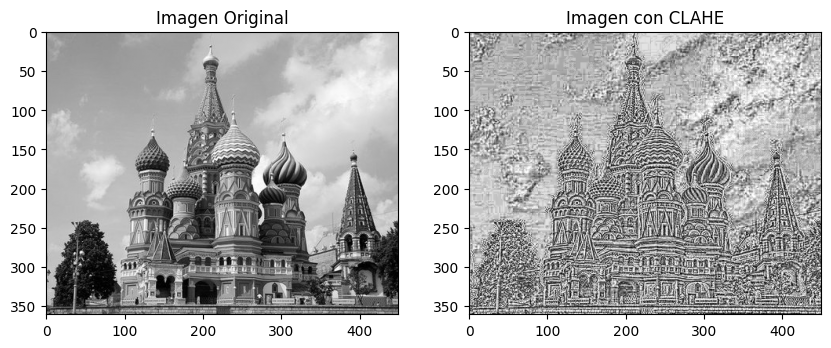

In [26]:
# Cargar una imagen en escala de grises
img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

# Aplicar CLAHE
img_clahe = clahe_image(img_tile, clip_limit=12.0, tile_grid_size=(160, 160))

# Mostrar las imágenes original y procesada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Imagen con CLAHE")
plt.imshow(img_clahe, cmap='gray')
plt.show()